<a href="https://colab.research.google.com/github/gkkhnyldz/MachineLearningLessonsProject/blob/main/cottonsoybeanandcornMatPlotLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's read the required libraries and data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

df = pd.read_csv('HW4Data.csv')

Let's look at our data in general

In [ ]:
df.tail()

,Days,Corn_NDVI_2013,Cotton_NDVI_2013,Soybean_NDVI_2013,Corn_NDVI_2014,Cotton_NDVI_2014,Soybean_NDVI_2014,Corn_MSAVI_2013,Cotton_MSAVI_2013,Soybean_MSAVI_2013,Corn_MSAVI_2014,Cotton_MSAVI_2014,Soybean_MSAVI_2014
159,275,0.165292,0.518346,0.461980,0.165432,0.455796,0.574145,0.282787,0.669671,0.595246,0.282014,0.617797,0.712689
160,276,0.164498,0.509941,0.447632,0.162055,0.441938,0.557055,0.281647,0.662383,0.582146,0.277008,0.603580,0.697083
161,277,0.163704,0.501536,0.433283,0.158678,0.428081,0.539965,0.280508,0.655096,0.569046,0.272002,0.589363,0.681478
162,278,0.162910,0.493131,0.418935,0.155301,0.414223,0.522876,0.279369,0.647808,0.555945,0.266996,0.575146,0.665872
163,279,0.162116,0.484727,0.404587,0.151924,0.400365,0.505786,0.278229,0.640521,0.542845,0.261989,0.560929,0.650266


Here I have graphed all the data, making the first look at the data more understandable.

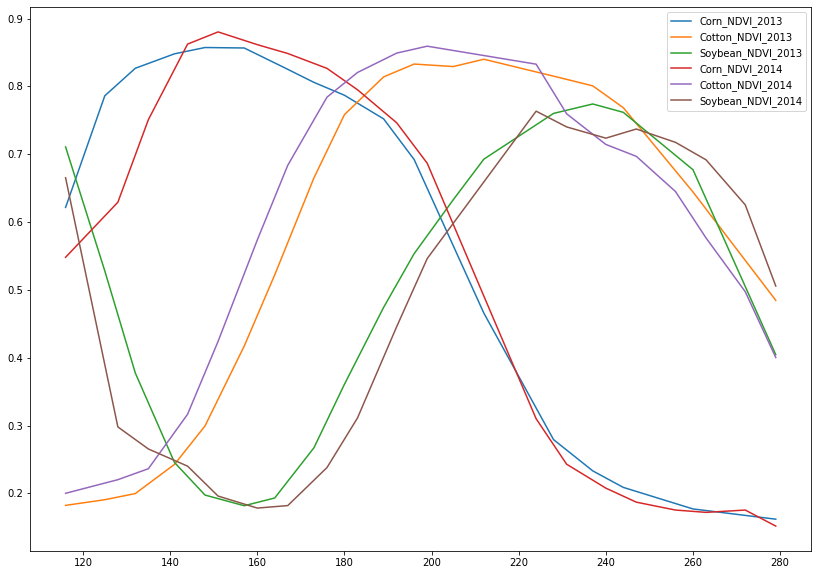

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 10))
plt.plot(df['Days'],df['Corn_NDVI_2013'])
plt.plot(df['Days'],df['Cotton_NDVI_2013'])
plt.plot(df['Days'],df['Soybean_NDVI_2013'])
plt.plot(df['Days'],df['Corn_NDVI_2014'])
plt.plot(df['Days'],df['Cotton_NDVI_2014'])
plt.plot(df['Days'],df['Soybean_NDVI_2014'])
plt.legend(['Corn_NDVI_2013','Cotton_NDVI_2013','Soybean_NDVI_2013',
            'Corn_NDVI_2014','Cotton_NDVI_2014','Soybean_NDVI_2014'])

# Question 1 Part 1

Fitting Both Manually and with SKLearn



In [ ]:
def homework4_q1(x,y):
  


  title= x+" "+" vs "+y+"\n"

  x = df[x].to_numpy()
  y = df[y].to_numpy()

# Manually Fitting 
  x1 = x;
  x2 = x**2

  X = np.column_stack((x1,x2))
  X_b = np.c_[np.ones((x.size, 1)), X]
  X_b

  w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
  print('[beta0, beta1, beta2] = ', w_estimate)

  y_hat_manual = X_b.dot(w_estimate)


  
#Fitting With SKLearn
  poly = PolynomialFeatures(degree=4)
  x_input = x[:,np.newaxis]
  x_mapped = poly.fit_transform(x_input)

  regressor = LinearRegression()
  regressor.fit(x_mapped, y)

  # Predicting values using our trained model
  y_hat_sk = regressor.predict(x_mapped)
  
# Plotting our findings
  plt.figure(figsize=(16, 14))

  # manual fitting plot
  plt.subplot(221)
  plt.scatter(x, y, s = 3)
  plt.scatter(x, y_hat_manual, s = 3, color='red')
  plt.title(title+'Blue is original data y, red is regression result y_hat_manual')
  plt.xlabel('x', fontsize=16)
  plt.ylabel('y', fontsize=16)

  # sk fitting plot
  plt.subplot(222)
  plt.scatter(x, y, s = 3)
  plt.scatter(x, y_hat_sk, s = 3, color='green')
  plt.title(title+'Blue is original data y, green is regression result y_hat_sk')
  plt.xlabel('x', fontsize=16)
  plt.ylabel('y', fontsize=16)

  # both manual and sk in one plot  
  plt.subplot(223)
  plt.scatter(x, y, s = 3)
  plt.scatter(x, y_hat_manual, s = 3, color='red')
  plt.scatter(x, y_hat_sk, s = 3, color='green')
  plt.title(title+'Blue is original data y, red is regression result y_hat_manual, green is y_hat_sk')
  plt.xlabel('x', fontsize=16)
  plt.ylabel('y', fontsize=16)
  
  # error between manual and sk results plot
  plt.subplot(224)
  plt.plot(y_hat_sk, y_hat_manual)
  plt.title(title+'y_hat correlation')
  plt.show()

  if  abs(1- np.average(y_hat_manual/y_hat_sk)) >= 0.01:
    print("Results between manual fitting and SKLearn fitting is different")
    print("y_hat_manual/y_hat_sk = ",np.average(y_hat_manual/y_hat_sk))
  else:
    print("Results between manual fitting and SKLearn fitting is same")
    print("y_hat_manual/y_hat_sk = ",round(np.average(y_hat_manual/y_hat_sk)))
  

[beta0, beta1, beta2] =  [ 4.49682972e-01  7.01424199e-03 -3.12056475e-05]


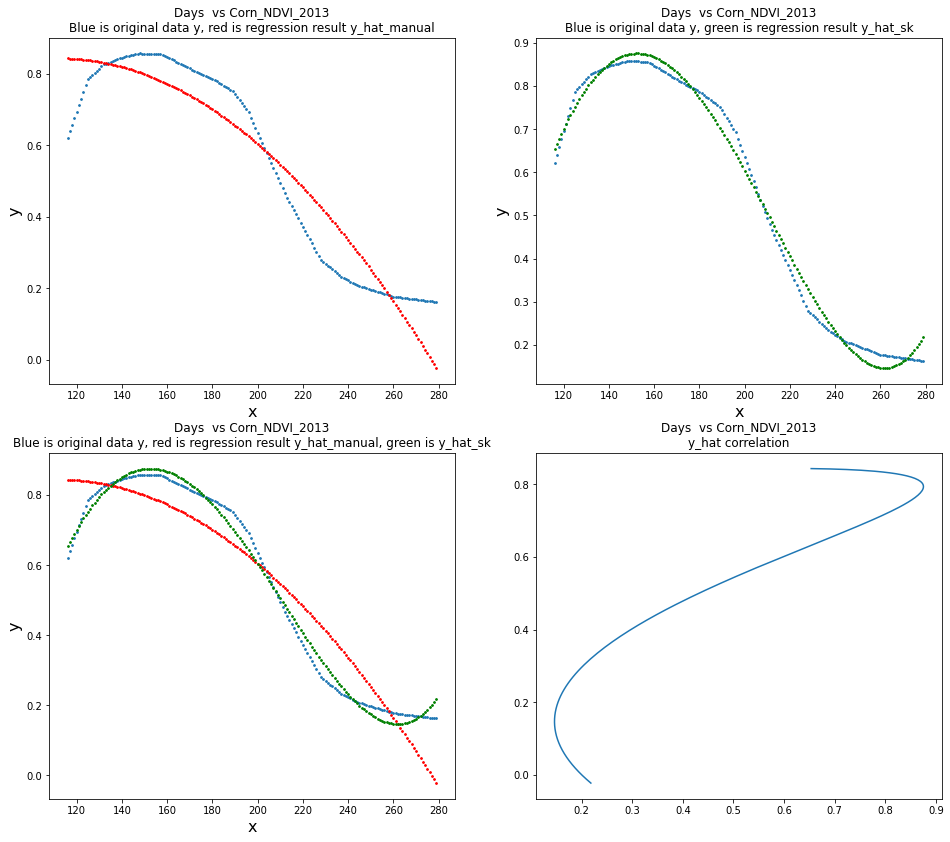

Results between manual fitting and SKLearn fitting is different
y_hat_manual/y_hat_sk =  1.019487471687442


In [ ]:
homework4_q1('Days','Corn_NDVI_2013')

[beta0, beta1, beta2] =  [-3.05815368e+00  3.56997684e-02 -8.22612385e-05]


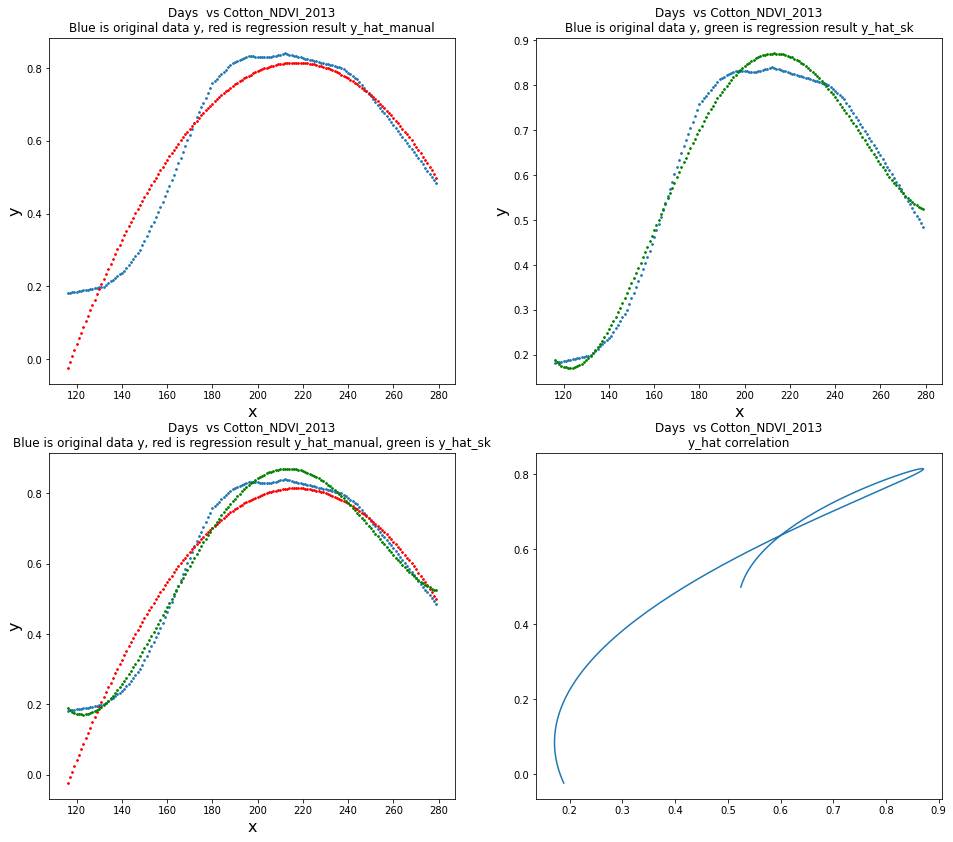

Results between manual fitting and SKLearn fitting is same
y_hat_manual/y_hat_sk =  1


In [ ]:
homework4_q1('Days','Cotton_NDVI_2013')

[beta0, beta1, beta2] =  [-1.85444194e-02  2.80896654e-03 -5.84943319e-07]


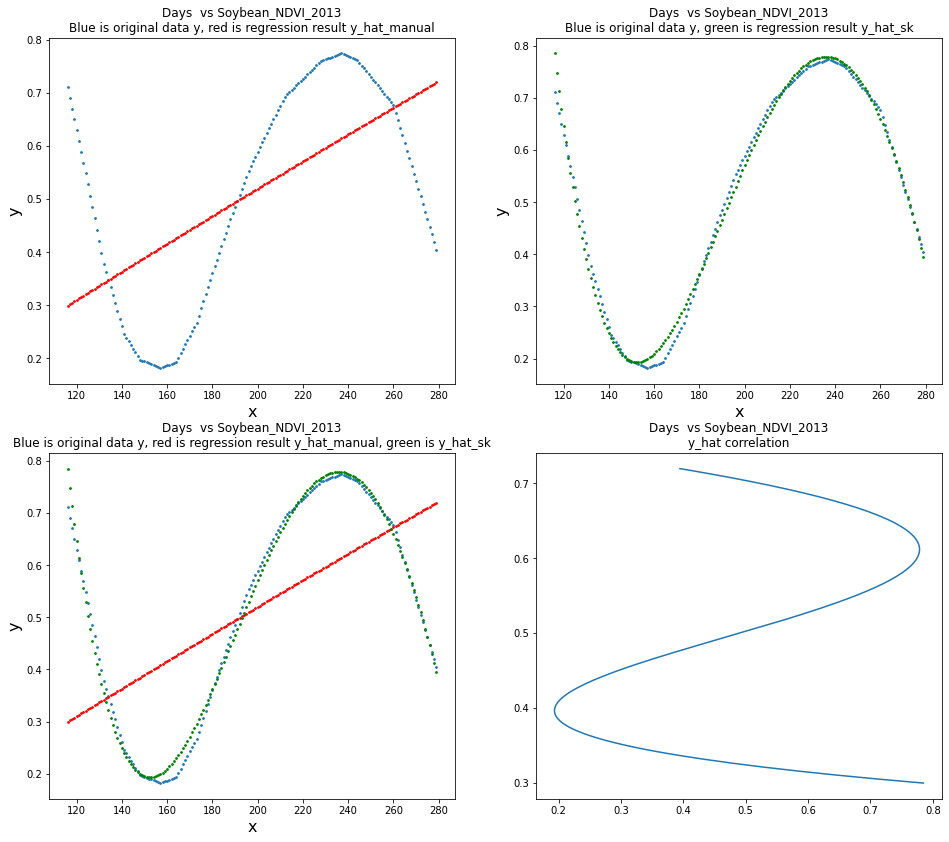

Results between manual fitting and SKLearn fitting is different
y_hat_manual/y_hat_sk =  1.1467815881640289


In [ ]:
homework4_q1('Days','Soybean_NDVI_2013')

# Question 1 Part 2

Determining best degree for each crop. \n

In this part we can use SKlearn to determine degree easily, because it gives the same results as manually fitting which can be observed in question 1 part 1

In [ ]:
def q1_part2(x,y):
  df2 = pd.read_csv('HW4Data.csv')
  title= x+" "+" vs "+y+"\n"
  x = df2[x].to_numpy()
  y = df2[y].to_numpy()

  # train and test split
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

  m_range = range(1, 15, 2)

  x_train_b = x_train[:,np.newaxis]
  y_train_b = y_train[:,np.newaxis]


# Testing and Testing errors
  training_errors=[]
  testing_errors=[]

  best_m = 0
  minError = math.inf

  for m in m_range:
      poly = PolynomialFeatures(degree=m)
    
      # note that in fit_transform part fit does nothing and transform does the generatoion of polynomial features
      x_train_mapped = poly.fit_transform(x_train_b)
      x_test_mapped = poly.fit_transform(x_test[:,np.newaxis])
    
      regressor = LinearRegression()
      regressor.fit(x_train_mapped, y_train)   # linear regression is on training data (no traning on test data)

      # Predicting values using our trained model
      y_train_hat = regressor.predict(x_train_mapped)
      y_test_hat = regressor.predict(x_test_mapped)
    
      train_error = mean_squared_error(y_train, y_train_hat)
      test_error = mean_squared_error(y_test, y_test_hat)

      training_errors.append(train_error)
      testing_errors.append(test_error)
    
      errorDecreaseTolerance = 0.99  # Set as 1 for no tolerance. lower values lead to lower m (more bias less variance)
      if test_error < minError * errorDecreaseTolerance:
          minError = test_error;
          best_m = m;      

  plt.figure(figsize=(16, 5))
  plt.subplot(121)
  plt.plot(m_range, training_errors, label = "train_MSE")
  plt.plot(m_range, testing_errors,color="red", label = "test_MSE")
  plt.xlabel("m")
  plt.ylabel("MSE")
  plt.title(title+"Train versus Test Mean Square Error (MSE) with respect to polynom order")
  plt.legend()

  print("Best m is ", best_m)  
  print("MSE for m_th order polynomial regression on test data is ", minError)

  poly_regression = Pipeline([
      ("poly", PolynomialFeatures(degree=best_m)),
      ("lin_reg", LinearRegression())
  ])

  
  poly_regression.fit(x_train_b, y_train_b)

  y_train_hat = poly_regression.predict(x_train_b)
  y_test_hat = poly_regression.predict(x_test[:,np.newaxis])
  y_hat = poly_regression.predict(x[:,np.newaxis])


  plt.subplot(122)
  plt.scatter(x_train, y_train, s = 3)
  plt.scatter(x_train, y_train_hat, s = 3, color='red')
  plt.title(title+'Blue is original data y, red is regression result y_hat (on train data)')
  plt.xlabel('x', fontsize=16)
  plt.ylabel('y', fontsize=16)
  plt.show()


When we look at the errors that occur according to all degrees, we can choose to use the 7th degree based on the graph within 3 factors. For this, a healthier solution can be found by specifying a range and comparing all degrees. But the 7th degree seems to be ideal for all.

Best m is  9
MSE for m_th order polynomial regression on test data is  0.00030224002924247943


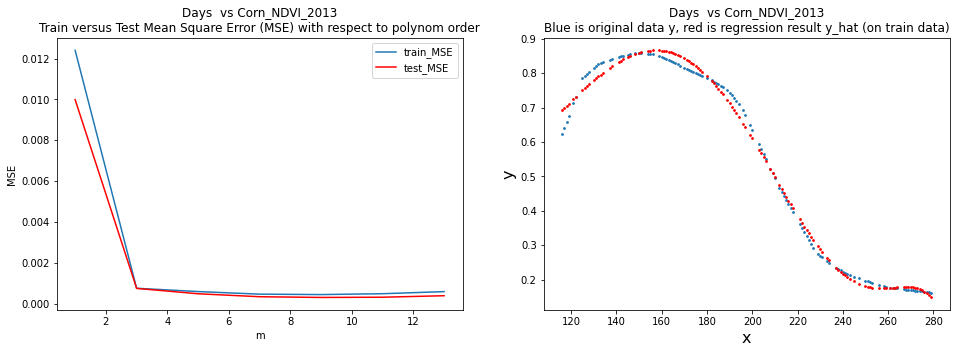

In [ ]:
q1_part2('Days','Corn_NDVI_2013')

Now our model continues with little change after the 7th degree. We can decide that we don't need to increase the model more in terms of both time and complexity. Also, if we look at the payoffs and costs of the margin of error for the problem we are interested in, we can decide to finish the model earlier and choose 3 or 4 degrees. The important factor here is the complexity of the model and the solution time, the importance and connection with the problem we are dealing with.

Best m is  5
MSE for m_th order polynomial regression on test data is  0.00035598654216533214


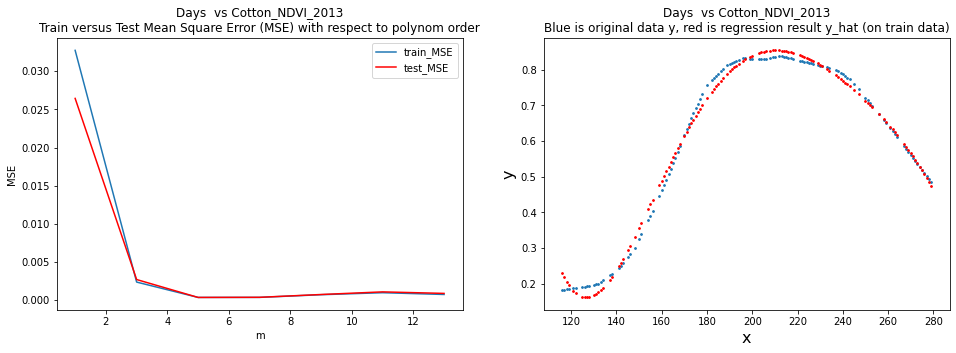

In [ ]:
q1_part2('Days','Cotton_NDVI_2013')

Here, we choose the 5th degree by looking at the MSE ratios in all the degrees we tried our model. When we look at the graph regarding the problem we have here, we can say that the most ideal degree appears to be 5 and the stabilization starts here.

Best m is  7
MSE for m_th order polynomial regression on test data is  0.00011636889629850625


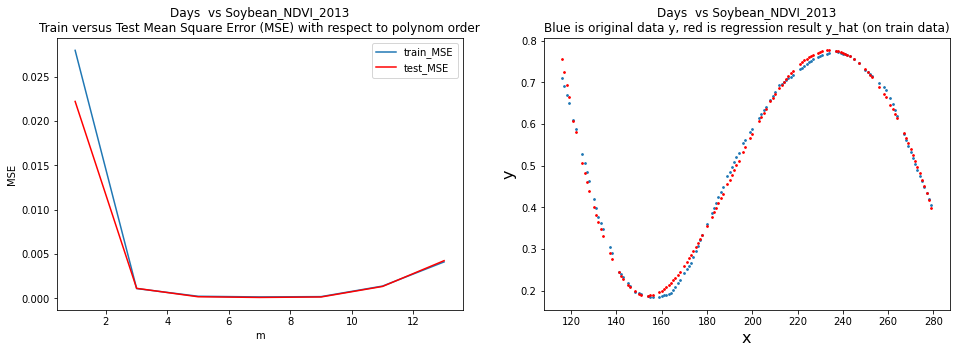

In [ ]:
q1_part2('Days','Soybean_NDVI_2013')

Here, when we look at the graph, we can see that the change in error rates between 4 and 5 in our model is small. When we evaluate the degrees among themselves, it is emphasized that we should choose the 7th degree with the lowest MSE rate. Here, the most important factors in model setup should be determined, if complexity and decision-making time If it has an effect that could cause significant losses, we may consider other degrees.

# Question 2

Estimate MSAVI from NDVI by using curve fitting in 2013.


Best m is  11
MSE for m_th order polynomial regression on test data is  6.968354227323954e-07


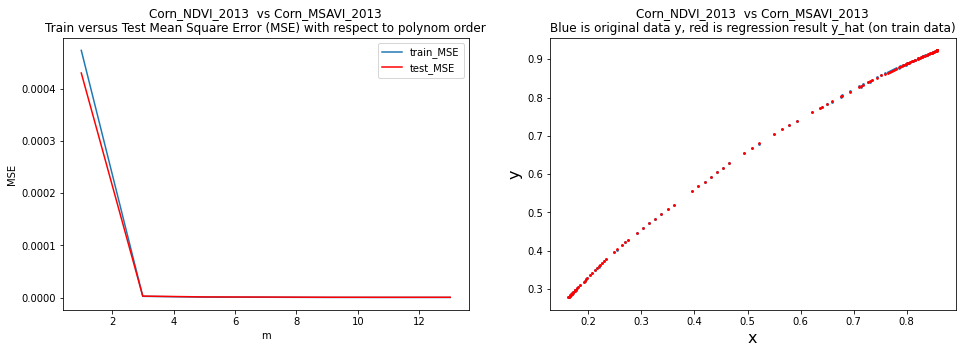

In [ ]:
q1_part2('Corn_NDVI_2013','Corn_MSAVI_2013')

Best m is  13
MSE for m_th order polynomial regression on test data is  2.304690748492058e-07


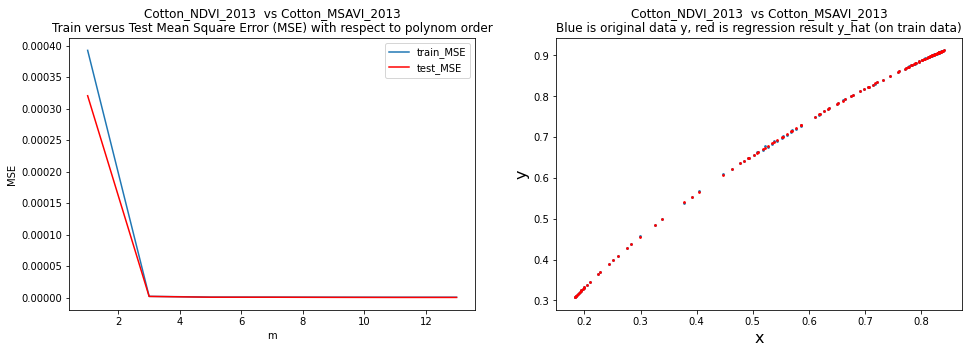

In [ ]:
q1_part2('Cotton_NDVI_2013','Cotton_MSAVI_2013')

Best m is  5
MSE for m_th order polynomial regression on test data is  1.1173929143560815e-05


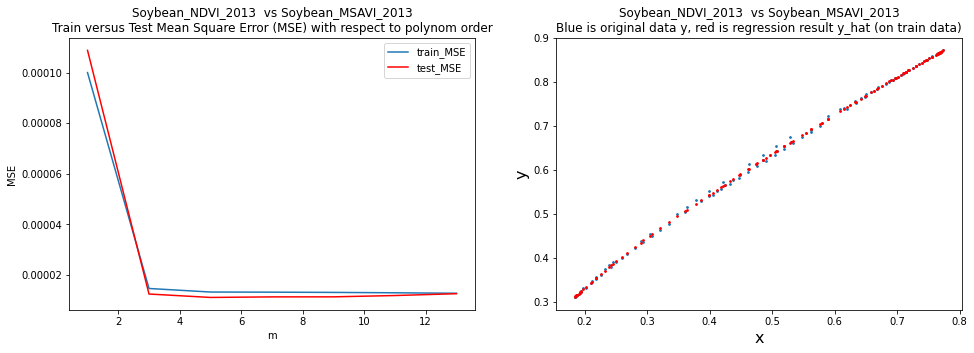

In [ ]:
q1_part2('Soybean_NDVI_2013','Soybean_MSAVI_2013')

# Question 3

Best m is  5
MSE for m_th order polynomial regression on test data is  0.0021542404407817115


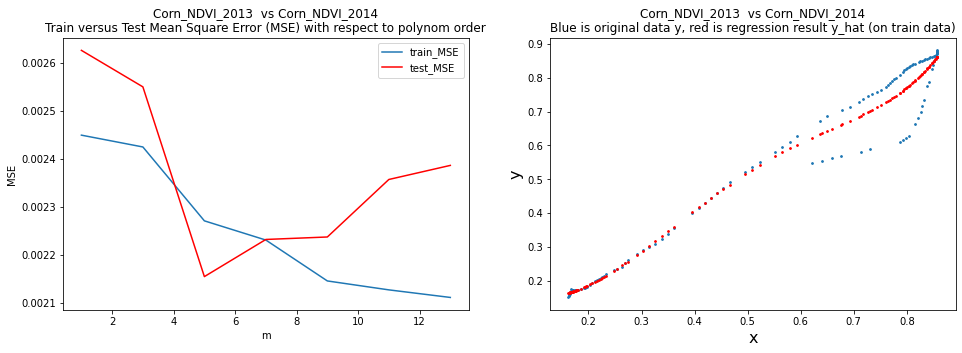

Best m is  13
MSE for m_th order polynomial regression on test data is  0.001237902237622953


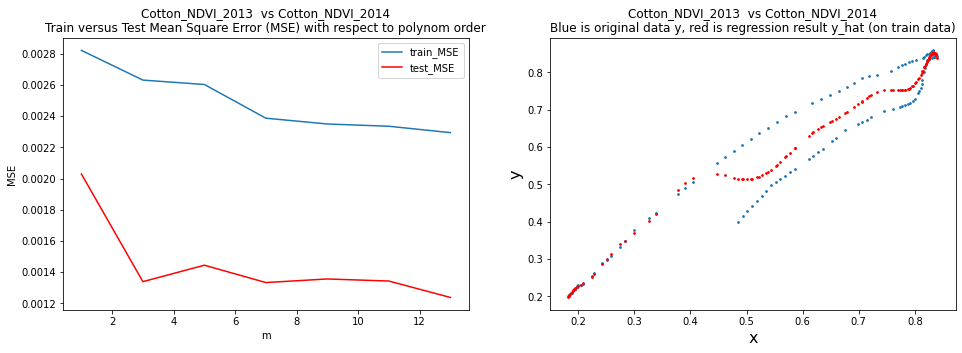

Best m is  3
MSE for m_th order polynomial regression on test data is  0.0018448194552318975


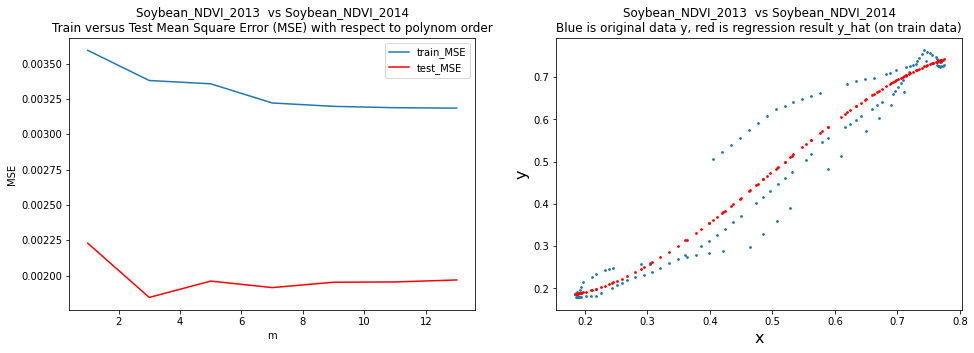

Best m is  5
MSE for m_th order polynomial regression on test data is  0.0011920232421316452


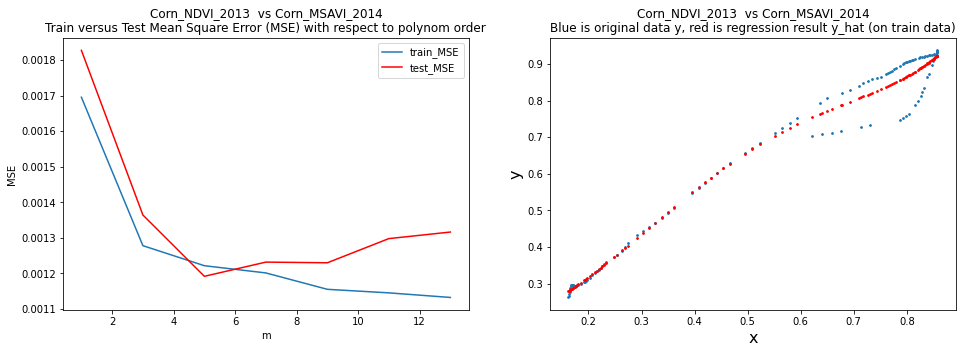

Best m is  13
MSE for m_th order polynomial regression on test data is  0.0006526554522562116


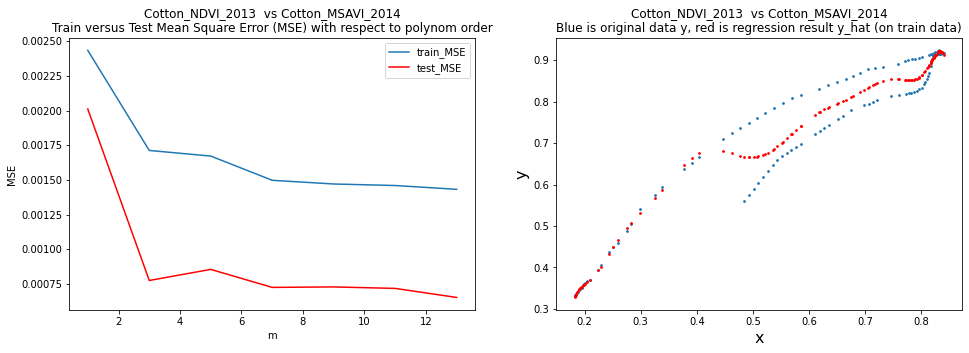

Best m is  3
MSE for m_th order polynomial regression on test data is  0.0021303666737952174


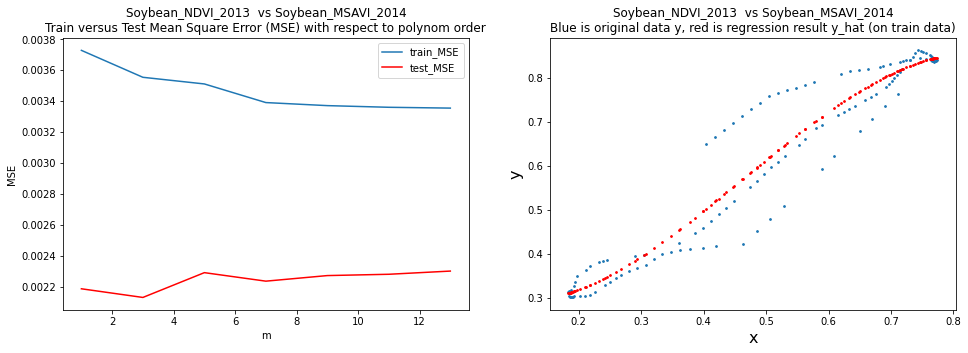

In [ ]:
q1_part2('Corn_NDVI_2013','Corn_NDVI_2014')
q1_part2('Cotton_NDVI_2013','Cotton_NDVI_2014')
q1_part2('Soybean_NDVI_2013','Soybean_NDVI_2014')
q1_part2('Corn_NDVI_2013','Corn_MSAVI_2014')
q1_part2('Cotton_NDVI_2013','Cotton_MSAVI_2014')
q1_part2('Soybean_NDVI_2013','Soybean_MSAVI_2014')

When we look at the values of cotton soybean and corn, we can think that cotton and soybean have similar characteristics and different strategies should be developed for corn.200. Looking at the day, there is a decrease in 3 crops. Here, changing situations and factors can be investigated.